In [2]:
# Cifar 10 dataset
# =========================
# Load the data
# =========================
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)

# Normalize pixel values (scale between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)


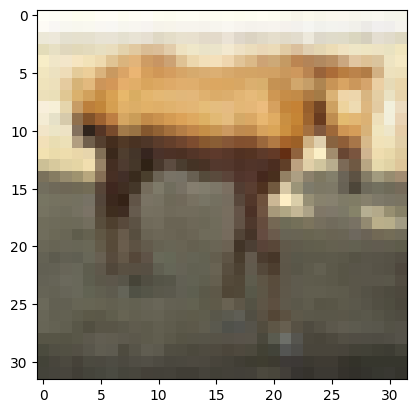

In [5]:
# show a random image
from matplotlib import pyplot as plt
plt.imshow(x_train[2000])
plt.show()

In [7]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

In [8]:
# Define Architecture
model = Sequential()
# Add Input Layer
model.add(Input(shape=(32,32,3))) # shape h, w and channel
# Add Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# add Faltten layer
model.add(Flatten())

# Add fully connected layer
model.add(Dense(50,activation='relu'))
# add output layer
model.add(Dense(10,activation='softmax'))
# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
# check summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,640 (111.88 KB)

 Trainable params: 28,640 (111.88 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# fit the model
training_history = model.fit(x_train,y_train,
                            epochs=3,
                            validation_data=(x_test,y_test),
                            batch_size=32)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.3792 - loss: 1.6885 - val_accuracy: 0.4803 - val_loss: 1.4363
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5072 - loss: 1.3759 - val_accuracy: 0.5395 - val_loss: 1.2866
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5539 - loss: 1.2558 - val_accuracy: 0.5617 - val_loss: 1.2339


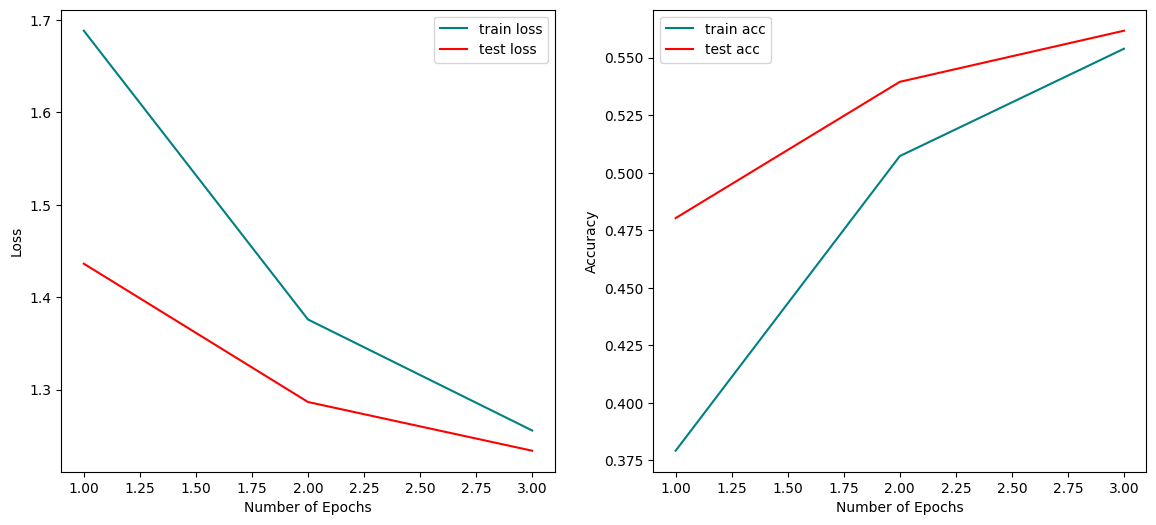

In [10]:
train_acc = training_history.history['accuracy']
test_acc = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
epochs=3
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_loss,label = "train loss",color='teal')
plt.plot(range(1,epochs+1),test_loss,label = "test loss",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),train_acc,label = "train acc",color='teal')
plt.plot(range(1,epochs+1),test_acc,label = "test acc",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# External Data


In [ ]:
from tensorflow.keras.utils import load_img
img1 = load_img("dataset/dataset/training_set/dogs/dog.1.jpg")
img2 = load_img("dataset/dataset/training_set/dogs/dog.1.jpg",target_size=(150,150))

img1

img2

In [11]:
# In my case the train dir and test dir is- (Please change as per your dir)
train_dir = "dataset/dataset/training_set/"
test_dir = "dataset/dataset/test_set/"

In [13]:
# load the data 
from tensorflow.keras.utils import image_dataset_from_directory
train_ds = image_dataset_from_directory(train_dir,
                                       batch_size=32,image_size=(150,150),shuffle=True)

test_ds = image_dataset_from_directory(test_dir,
                                       batch_size=32,image_size=(150,150))


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [20]:
# define the model
# Define Architecture
model = Sequential()
# Add Input Layer
model.add(Input(shape=(150,150,3))) # shape h, w and channel
# Add Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# add Faltten layer
model.add(Flatten())

# Add fully connected layer
model.add(Dense(50,activation='relu'))
# add output layer
model.add(Dense(1,activation='sigmoid'))
# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
# check summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4624)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │         231,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,181 (1000.71 KB)

 Trainable params: 256,181 (1000.71 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# fit the model
training_history = model.fit(train_ds,
                            epochs=10,
                            validation_data=test_ds,
                            batch_size=32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 415ms/step - accuracy: 0.5380 - loss: 0.9711 - val_accuracy: 0.4990 - val_loss: 0.6904
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 371ms/step - accuracy: 0.5701 - loss: 0.6716 - val_accuracy: 0.5175 - val_loss: 0.7091
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 345ms/step - accuracy: 0.6014 - loss: 0.6404 - val_accuracy: 0.5105 - val_loss: 0.7656
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 88s 352ms/step - accuracy: 0.6585 - loss: 0.5875 - val_accuracy: 0.5300 - val_loss: 0.7730
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 123s 492ms/step - accuracy: 0.6955 - loss: 0.5350 - val_accuracy: 0.5175 - val_loss: 0.9511
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 126s 504ms/step - accuracy: 0.7444 - loss: 0.4841 - val_accuracy: 0.5215 - val_loss: 0.9432
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 422ms/step - accuracy: 0.7876 - loss: 0.4189 - val_accuracy: 0.5460 - val_loss: 1.1808
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 342ms/step - accuracy: 0.8026 - los

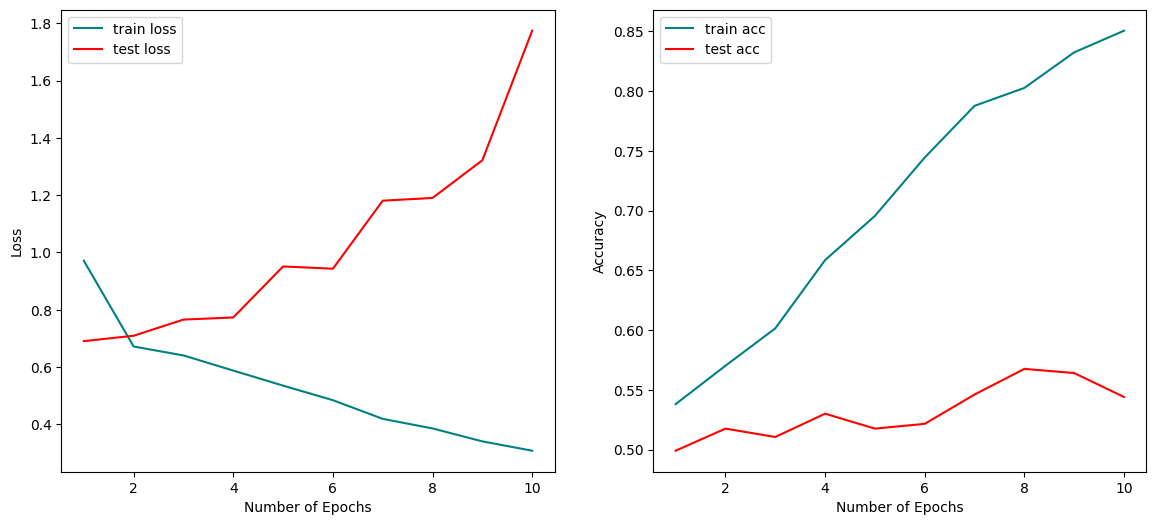

In [22]:
train_acc = training_history.history['accuracy']
test_acc = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
epochs=10
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_loss,label = "train loss",color='teal')
plt.plot(range(1,epochs+1),test_loss,label = "test loss",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),train_acc,label = "train acc",color='teal')
plt.plot(range(1,epochs+1),test_acc,label = "test acc",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

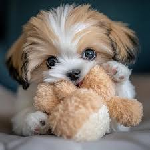

In [23]:
# Apply model on a new image
from tensorflow.keras.utils import load_img, img_to_array
img_new = load_img("dog.jpeg",target_size=(150,150))
img_new

In [24]:
img_new_array = img_to_array(img_new)
img_new_array.shape

(150, 150, 3)

In [25]:
# reshape to n,h,w,c
img_new_reshaped = img_new_array.reshape(1,150,150,3)
# apply model
model.predict(img_new_reshaped) # give whats the prob of 1 viz dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


array([[0.6685757]], dtype=float32)

## Use a pre trained model

In [26]:
# use VGG 16 model on above dog image img_new
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# load this model
vgg_model = VGG16()

In [34]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# load image 
img_new = load_img("dog.jpeg",target_size=(224,224))
img_new_array = img_to_array(img_new)
img_new_reshaped = img_new_array.reshape(1,224,224,3)
# lets apply this model on img_new_reshaped
# First we preprocess input
img_new_processed = preprocess_input(img_new_reshaped)

In [32]:
pred_prob=vgg_model.predict(img_new_processed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


In [33]:
pred_prob.shape

(1, 1000)

In [35]:
# decode the prediction
from tensorflow.keras.applications.vgg16 import decode_predictions
decoded_pred = decode_predictions(pred_prob, top=5)[0]
for i, (id, label, score) in enumerate(decoded_pred):
    print(f"{i+1}, {label}:{score:.4f}")

1, Shih-Tzu:0.4871
2, Lhasa:0.4389
3, Tibetan_terrier:0.0475
4, Maltese_dog:0.0071
5, Pekinese:0.0055


## Transfer Learning

In [36]:
# Load pre trained model
# use VGG 16 model on above dog image img_new
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# load this model
base_model = VGG16(include_top=False)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Freeze the weights of base model
for layer in base_model.layers:
    layer.trainable = False

In [38]:
# Define Architecture
model = Sequential()
# Add Input Layer
model.add(Input(shape=(224,224,3))) # shape h, w and channel
# add base model
model.add(base_model)
# Add Convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu'))
# add maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# add Faltten layer
model.add(Flatten())

# Add fully connected layer
model.add(Dense(50,activation='relu'))
# add output layer
model.add(Dense(1,activation='sigmoid'))
# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
# check summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 5, 5, 8)             │          36,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,753,261 (56.28 MB)

 Trainable params: 38,573 (150.68 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [39]:
# load the data
# load the data 
from tensorflow.keras.utils import image_dataset_from_directory
train_ds = image_dataset_from_directory(train_dir,
                                       batch_size=32,image_size=(224,224),shuffle=True)

test_ds = image_dataset_from_directory(test_dir,
                                       batch_size=32,image_size=(224,224))


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# fit the model
training_history = model.fit(train_ds,
                            epochs=5,
                            validation_data=test_ds,
                            batch_size=32)

Epoch 1/5
 28/250 ━━━━━━━━━━━━━━━━━━━━ 23:50 6s/step - accuracy: 0.6687 - loss: 2.4812

In [ ]:
train_acc = training_history.history['accuracy']
test_acc = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
epochs=5
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_loss,label = "train loss",color='teal')
plt.plot(range(1,epochs+1),test_loss,label = "test loss",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),train_acc,label = "train acc",color='teal')
plt.plot(range(1,epochs+1),test_acc,label = "test acc",color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()